<a href="https://colab.research.google.com/github/Shreeranga1/TimeSeries/blob/main/timeSerieSsession2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreeranga1/TimeSeries/main/RetailTurnover.csv')
df.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [5]:
df.Year.sort_values

<bound method Series.sort_values of 0     1982
1     1982
2     1983
3     1983
4     1983
5     1983
6     1984
7     1984
8     1984
9     1984
10    1985
11    1985
12    1985
13    1985
14    1986
15    1986
16    1986
17    1986
18    1987
19    1987
20    1987
21    1987
22    1988
23    1988
24    1988
25    1988
26    1989
27    1989
28    1989
29    1989
30    1990
31    1990
32    1990
33    1990
34    1991
35    1991
36    1991
37    1991
38    1992
Name: Year, dtype: int64>

In [6]:
quaters=pd.date_range(start='1/7/1982',end='31/3/1992',freq='Q')

In [7]:
quaters

DatetimeIndex(['1982-03-31', '1982-06-30', '1982-09-30', '1982-12-31',
               '1983-03-31', '1983-06-30', '1983-09-30', '1983-12-31',
               '1984-03-31', '1984-06-30', '1984-09-30', '1984-12-31',
               '1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
df['Time_stamp']=pd.DataFrame(quaters)
df.drop(columns=['Year','Quarter'],axis=1,inplace=True)


In [9]:
df.set_index('Time_stamp',inplace=True)

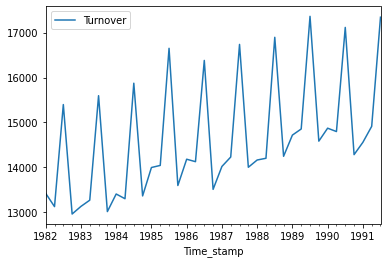

In [10]:
df.plot()

In [28]:
pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-6v_zs4r2
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-6v_zs4r2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev0+10.g6cf1e09ef-cp37-cp37m-linux_x86_64.whl size=17840569 sha256=af01f21a0803e18446a27dce9e6d769848f6dacf42d4ac2e33733478477ebcfd
  Stored in directory: /tmp/pip-ephem-wheel-cache-bbq7tsik/wheels/5c/ab/d8/d9505a18dd992621edd24cfddb9a1bd694dee85c065c0a6e57
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

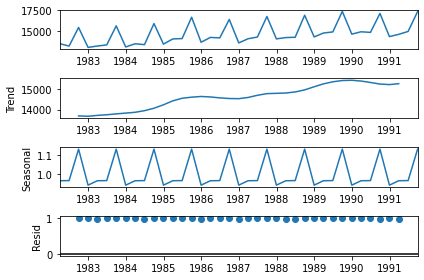

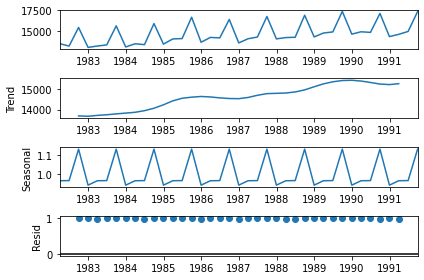

In [12]:
seasonal_decompose(df,model='multiplicative').plot()

In [13]:
df.head()

,Turnover
Time_stamp,
1982-03-31,13423.2
1982-06-30,13128.8
1982-09-30,15398.8
1982-12-31,12964.2
1983-03-31,13133.5


In [22]:
from datetime import datetime,timedelta

In [18]:
train_end=datetime(1988,9,30)
test_end=datetime(1991,9,30)

In [24]:
train =df[:train_end]
test = df[train_end+timedelta(days=1):test_end]

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [28]:
model_TES =ExponentialSmoothing(train,trend='multiplicative',seasonal='additive',initialization_method='estimated')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [29]:
model_tes=model_TES.fit(optimized=True)

In [30]:
model_tes.summary()

Dep. Variable:,Turnover,No. Observations:,27
Model:,ExponentialSmoothing,SSE,890121.097
Optimized:,True,AIC,296.888
Trend:,Multiplicative,BIC,307.255
Seasonal:,Additive,AICC,310.638
Seasonal Periods:,4,Date:,"Fri, 15 Oct 2021"
Box-Cox:,False,Time:,18:21:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6060714,alpha,True
smoothing_trend,0.0001,beta,True


In [32]:
model_TES.fit(smoothing_level=0.60,smoothing_trend=0.0001, smoothing_seasonal=0.0001,optimized=True)

In [34]:
TES_add_predict =model_tes.forecast(len(test))

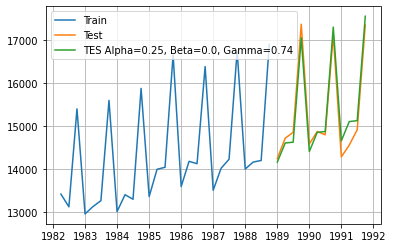

In [37]:
import matplotlib.pyplot               as      plt
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(TES_add_predict,label='TES Alpha=0.25, Beta=0.0, Gamma=0.74')
plt.legend(loc='best')
plt.grid()